In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Clean_Dataset.csv")

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.shape

(300153, 12)

In [5]:
data.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [6]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
data["Travelling_Cities"] = data["source_city"] +'-'+ data["destination_city"]

In [10]:
data['Travelling_Cities'] = data.Travelling_Cities.replace('Delhi-Mumbai','Mumbai-Delhi')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Delhi-Bangalore','Bangalore-Delhi')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Bangalore-Mumbai','Mumbai-Bangalore')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Mumbai-Kolkata','Kolkata-Mumbai')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Delhi-Kolkata','Kolkata-Delhi')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Delhi-Chennai','Chennai-Delhi')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Mumbai-Hyderabad','Hyderabad-Mumbai')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Mumbai-Chennai','Chennai-Mumbai')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Bangalore-Kolkata','Kolkata-Bangalore')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Delhi-Hyderabad','Hyderabad-Delhi')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Bangalore-Hyderabad','Hyderabad-Bangalore')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Hyderabad-Kolkata','Kolkata-Hyderabad')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Chennai-Kolkata','Kolkata-Chennai')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Chennai-Bangalore','Bangalore-Chennai')
data['Travelling_Cities'] = data.Travelling_Cities.replace('Hyderabad-Chennai','Chennai-Hyderabad')

In [11]:
# Adding Distance column
data['distance'] = 0
data.loc[data['Travelling_Cities'] == 'Mumbai-Delhi', 'distance' ] = 1148
data.loc[data['Travelling_Cities'] == 'Bangalore-Delhi', 'distance' ] = 1740
data.loc[data['Travelling_Cities'] == 'Mumbai-Bangalore', 'distance'] = 842
data.loc[data['Travelling_Cities'] == 'Kolkata-Mumbai', 'distance' ] = 1652
data.loc[data['Travelling_Cities'] == 'Kolkata-Delhi', 'distance' ] = 1305
data.loc[data['Travelling_Cities'] == 'Chennai-Delhi', 'distance' ] = 1760
data.loc[data['Travelling_Cities'] == 'Hyderabad-Mumbai', 'distance'] = 617
data.loc[data['Travelling_Cities'] == 'Kolkata-Bangalore','distance'] = 1560
data.loc[data['Travelling_Cities'] == 'Chennai-Mumbai', 'distance' ] = 1028
data.loc[data['Travelling_Cities'] == 'Hyderabad-Delhi', 'distance' ] = 1253
data.loc[data['Travelling_Cities'] == 'Hyderabad-Bangalore','distance'] = 503
data.loc[data['Travelling_Cities'] == 'Kolkata-Hyderabad', 'distance'] = 1180
data.loc[data['Travelling_Cities'] == 'Kolkata-Chennai', 'distance' ] = 1366
data.loc[data['Travelling_Cities'] == 'Bangalore-Chennai', 'distance'] = 284
data.loc[data['Travelling_Cities'] == 'Chennai-Hyderabad', 'distance'] = 521

In [12]:

data = data.drop(columns = ['Unnamed: 0', 'flight' ],axis=1)
data.columns = data.columns.str.replace('class','Ticket_Cat')
data.sample(n = 5, replace = False)

,airline,source_city,departure_time,stops,arrival_time,destination_city,Ticket_Cat,duration,days_left,price,Travelling_Cities,distance
242540,Vistara,Mumbai,Night,one,Morning,Chennai,Business,13.00,16,74365,Chennai-Mumbai,1028
270392,Air_India,Kolkata,Afternoon,one,Morning,Hyderabad,Business,19.00,5,52063,Kolkata-Hyderabad,1180
159601,Indigo,Hyderabad,Morning,zero,Morning,Mumbai,Economy,1.58,11,4453,Hyderabad-Mumbai,617
24824,GO_FIRST,Delhi,Morning,one,Night,Kolkata,Economy,13.08,28,5954,Kolkata-Delhi,1305
224040,Vistara,Delhi,Evening,one,Morning,Chennai,Business,13.00,35,65832,Chennai-Delhi,1760


In [13]:
data.skew()

duration     0.602899
days_left   -0.035464
price        1.061377
distance    -0.343046
dtype: float64

### From the above skew measure we can see that the price and price_per_100km these columns are skewed

# Checking outilers in the price column

<AxesSubplot:xlabel='price'>

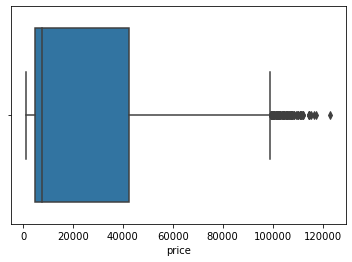

In [14]:
sns.boxplot(data["price"])

<AxesSubplot:xlabel='price', ylabel='Density'>

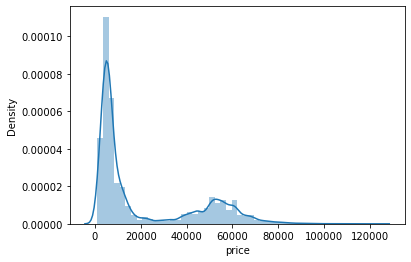

In [15]:
sns.distplot(data["price"])

<AxesSubplot:>

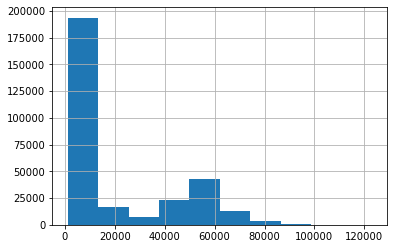

In [16]:
data["price"].hist()

###### From above plots and skew measure we can see that our price column is positively skewed.
###### Also from boxplot we can see that price column contains outliers


# Handling outliers

## Here our price column distribution is positively skewed so, we need to use IQR method to impute outliers 

In [17]:
IQR=data["price"].quantile(0.75)-data["price"].quantile(0.25)
IQR

37738.0

In [18]:
ub=data["price"].quantile(0.75)+(3*IQR)
lb=data["price"].quantile(0.25)-(3*IQR)
ub,lb

(155735.0, -108431.0)

In [19]:
data["price"].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [20]:
data.loc[data["price"]>155735,"price"]=155735

<AxesSubplot:xlabel='price', ylabel='Density'>

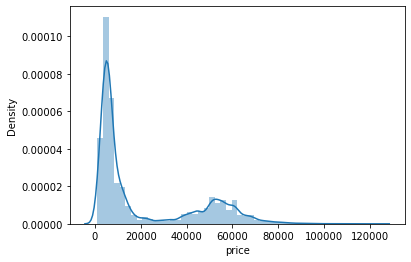

In [21]:
sns.distplot(data["price"])

### Here if we can use 3IQR then their are not much otliers present in the price column

## Dealing with skewness of price column

Here our price column is very skewed to reduce the skweness of our column we are using log transformation here.

In [22]:
data['log_price'] = np.log(data['price']) # log Transformation of price column

<AxesSubplot:>

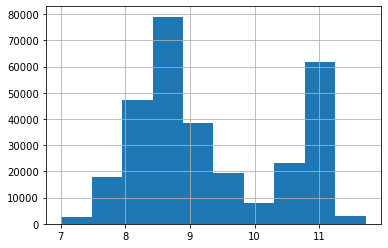

In [23]:
data["log_price"].hist()

In [24]:
data["log_price"].skew()

0.40440314918834797

In [25]:
data.skew()

duration     0.602899
days_left   -0.035464
price        1.061377
distance    -0.343046
log_price    0.404403
dtype: float64

#### Extract Dataframe for economy and business class

In [26]:
df_econ = data[data['Ticket_Cat']=='Economy']
df_buss = data[data['Ticket_Cat']=='Business']

In [27]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Ticket_Cat,duration,days_left,price,Travelling_Cities,distance,log_price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Mumbai-Delhi,1148,8.691651
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Mumbai-Delhi,1148,8.691651
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Mumbai-Delhi,1148,8.692154
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Mumbai-Delhi,1148,8.691986
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Mumbai-Delhi,1148,8.691986


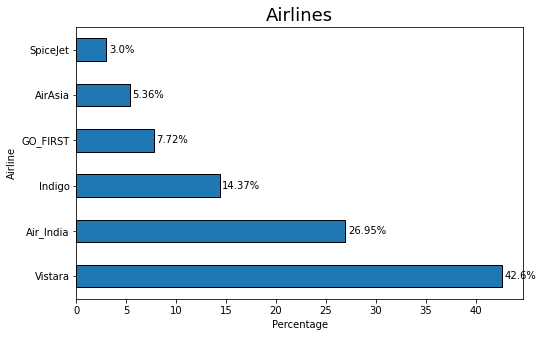

In [28]:
pct_airline = data.airline.value_counts()/data.airline.value_counts().sum()*100
plt.figure(figsize=(8,5))
plt1=pct_airline.plot.barh(edgecolor = 'black')
plt.title('Airlines',fontsize=18)
plt.xlabel('Percentage')
plt.ylabel('Airline')
for i in range(len(pct_airline)):
    plt.text(pct_airline[i]+.25,i,str(round(pct_airline,2)[i])+'%',va='center',color = 'black')

#### Maximum number of flight tickets are of Vistara Airline (42.6%) and minimum of Spicejet (3.0%).

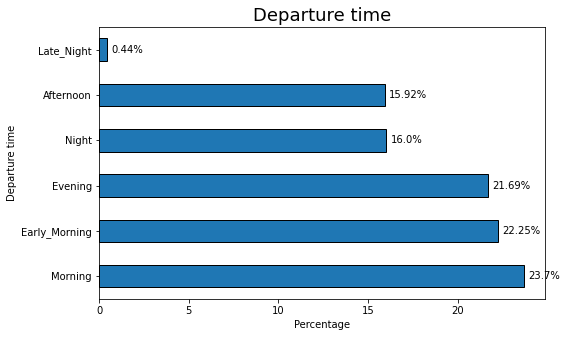

In [29]:
pct_dep = data['departure_time'].value_counts()/data['departure_time'].value_counts().sum()*100
pct_arr = data['arrival_time'].value_counts()/data['arrival_time'].value_counts().sum()*100
plt.figure(figsize=(8,5))
plt1=pct_dep.plot.barh(edgecolor = 'black')
plt.title('Departure time',fontsize=18)
plt.xlabel('Percentage')
plt.ylabel('Departure time')
for i in range(len(pct_dep)):
    plt.text(pct_dep[i]+.25,i,str(round(pct_dep,2)[i])+'%',va='center',color = 'black')

#### About 46% of the flights have Departure time Morning and Early Morning while just 0.44% have Late night departure. Thus,  Most of people prefer to start the journey in the Morning.

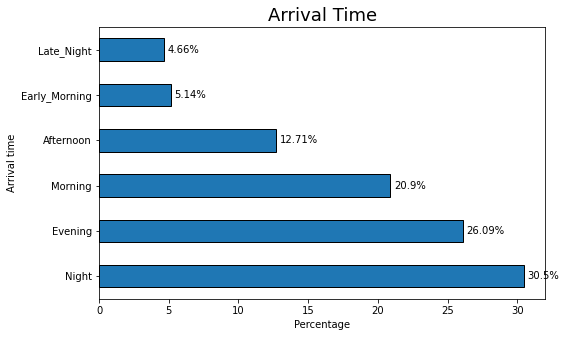

In [30]:
plt.figure(figsize=(8,5))
plt1=pct_arr.plot.barh(edgecolor = 'black')
plt.title('Arrival Time',fontsize=18)
plt.xlabel('Percentage')
plt.ylabel('Arrival time')
for i in range(len(pct_arr)):
    plt.text(pct_arr[i]+.25,i,str(round(pct_arr,2)[i])+'%',va='center',color = 'black')

#### About 56% of the flights have Arrival time Evening and Night while just 4.66% flights have Late night arrival. Most of people prefer to reach destination by Night.

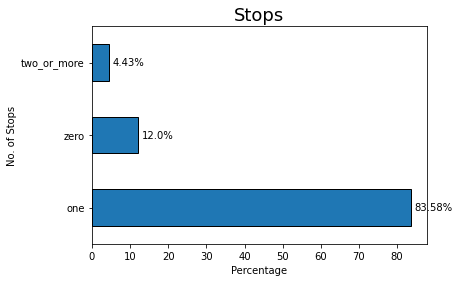

In [31]:
pct_stops = data['stops'].value_counts()/data['stops'].value_counts().sum()*100
plt1=pct_stops.plot.barh(edgecolor = 'black')
plt.title('Stops',fontsize=18)
plt.xlabel('Percentage')
plt.ylabel('No. of Stops')
for i in range(len(pct_stops)):
    plt.text(pct_stops[i]+1,i,str(round(pct_stops,2)[i])+'%',va='center',color = 'black')

#### About 83.58% of flights takes single stop and just 4.43% takes more than one stops between the source and destination. Thus, people prefers to take single stop before reaching to the destination.

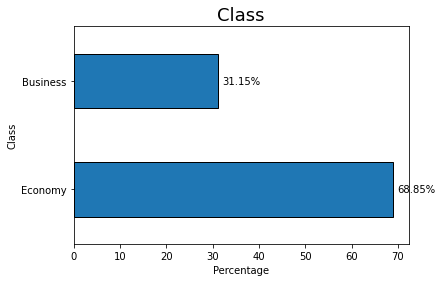

In [32]:
pct_Ticket_Cat = data['Ticket_Cat'].value_counts()/data['Ticket_Cat'].value_counts().sum()*100
plt1=pct_Ticket_Cat.plot.barh(edgecolor = 'black')
plt.title('Class',fontsize=18)
plt.xlabel('Percentage')
plt.ylabel('Class')
for i in range(len(pct_Ticket_Cat)):
    plt.text(pct_Ticket_Cat[i]+1,i,str(round(pct_Ticket_Cat,2)[i])+'%',va='center',color = 'black')

#### There are 68.85% of tickets are of Economy class while 31.15% are of Business class

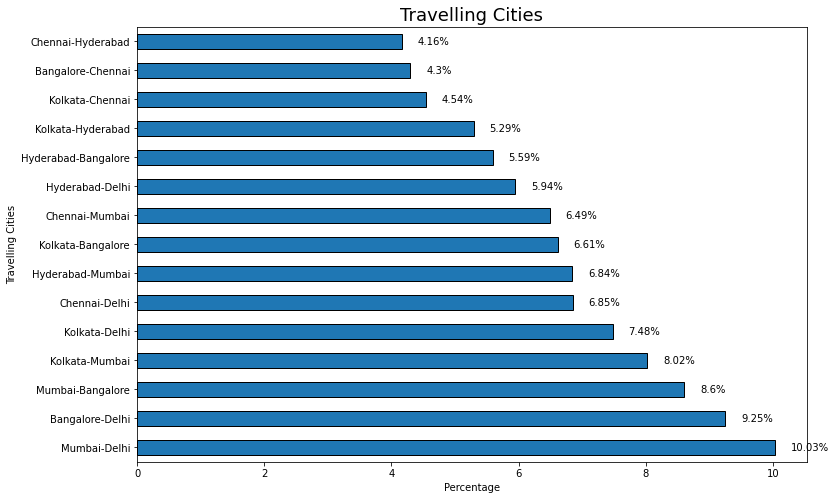

In [33]:
pct_routes = data['Travelling_Cities'].value_counts()/data['Travelling_Cities'].value_counts().sum()*100
plt.figure(figsize=(12,8))
plt1=pct_routes.plot.barh(edgecolor = 'black')
plt.title('Travelling Cities',fontsize=18)
plt.xlabel('Percentage')
plt.ylabel('Travelling Cities')
for i in range(len(pct_routes)):
    plt.text(pct_routes[i]+.25,i,str(round(pct_routes,2)[i])+'%',va='center',color = 'black')

#### Number of flights is maximum between Mumbai and Delhi (10.03%) and minimum between Chennai and Hyderabad (4.16%)

Text(0.5, 1.0, 'Boxplot of log Prices per Airline and Class')

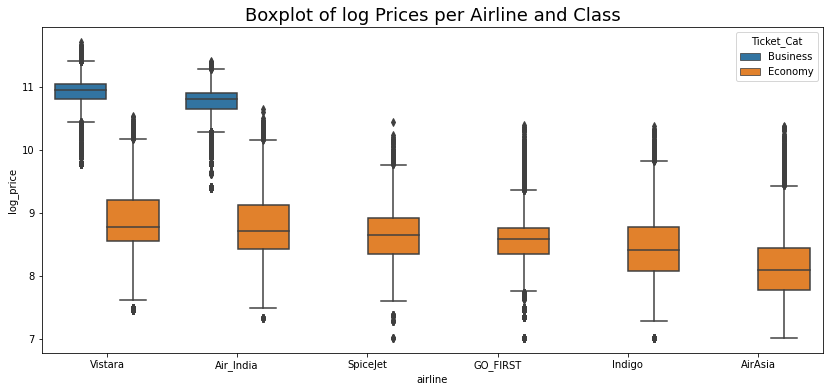

In [34]:
plt.figure(figsize=(14,6))
sns.boxplot(x='airline',y='log_price',hue='Ticket_Cat',data=data.sort_values('price',ascending=False))
plt.title('Boxplot of log Prices per Airline and Class',fontsize=18)

#### There are only two airlines have business class and is much more expensive than Economy class.The median prices of Vistara Airline is higher as compared with others, while Air Asiahas lower. Also variation in Economy is higher than business class

<Figure size 864x432 with 0 Axes>

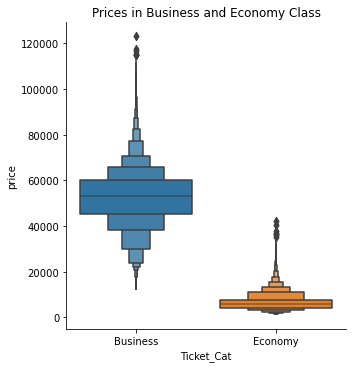

In [35]:
plt.figure(figsize=(12,6))
sns.catplot(x='Ticket_Cat',y='price',data=data.sort_values('price',ascending=False),kind='boxen')
plt.title('Prices in Business and Economy Class')
plt.show()

#### The prices of Business Class is much higher and have higher variation than Economy Class. Also, the distribution of Price in  Economy class is highly positively skewed as compared to the Business class

Text(0.5, 1.0, 'Histogram of log prices')

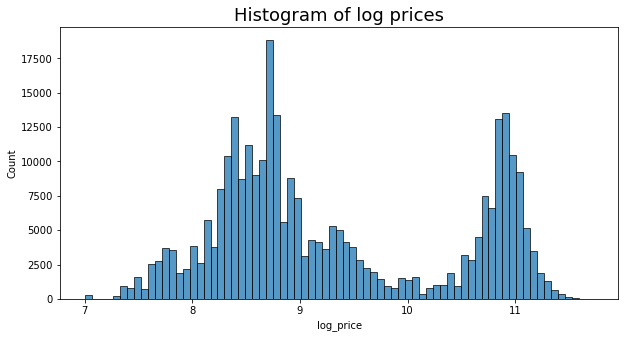

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(data['log_price'])
plt.title('Histogram of log prices',fontsize=18)

#### The distribution of log prices looks like in a two parts, i.e. it is of mixture of business and economy class prices.


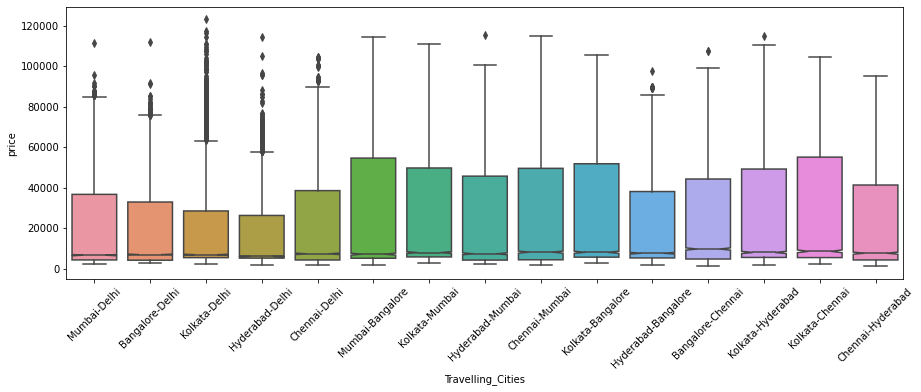

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Travelling_Cities',y='price',notch= True,data=data).tick_params(axis='x', rotation=45)

#### The median price is higher for the flights between the Hyderabad and Bangalore. The disribution of price is highly positively skewed for every routes.

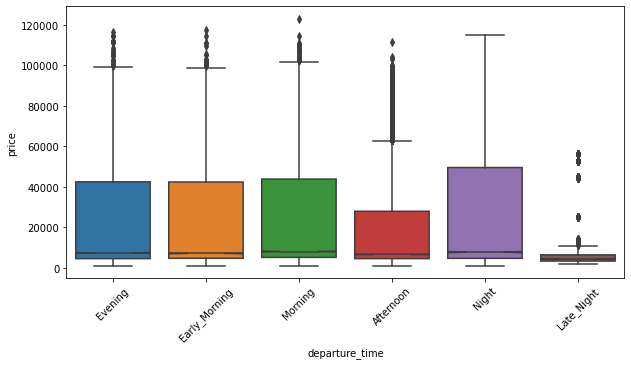

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='departure_time',notch= True,y='price',data=data).tick_params(axis='x', rotation=45)

#### The distribution of Late_night departure price has minimum variation and have minimum price, i.e. Prices for tickets doesn’t much changes for the  late night flights


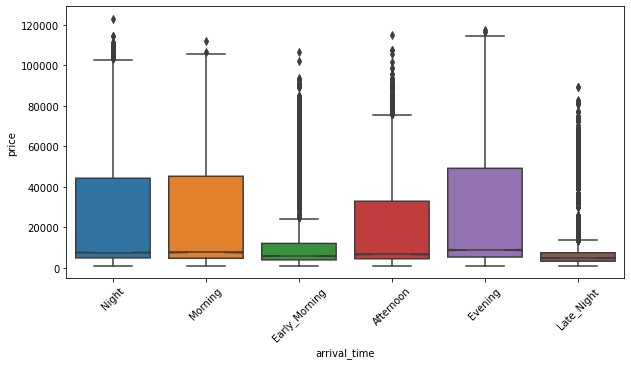

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x='arrival_time',notch= True,y='price',data=data).tick_params(axis='x', rotation=45)

#### The distribution of price of tickets has very less variation for the flights which have late night or early morning arrival time. Also median price is minimum for Late night arrival flights.

### Q) How is the price affected when tickets are bought in just 1 or 2 days before departure?


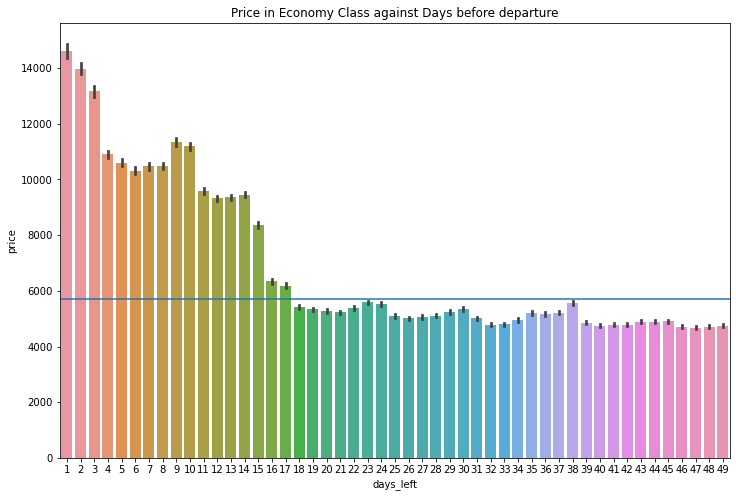

In [40]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Price in Economy Class against Days before departure')
sns.barplot(x='days_left',y= 'price', data=df_econ)
plt.axhline(y=5700)

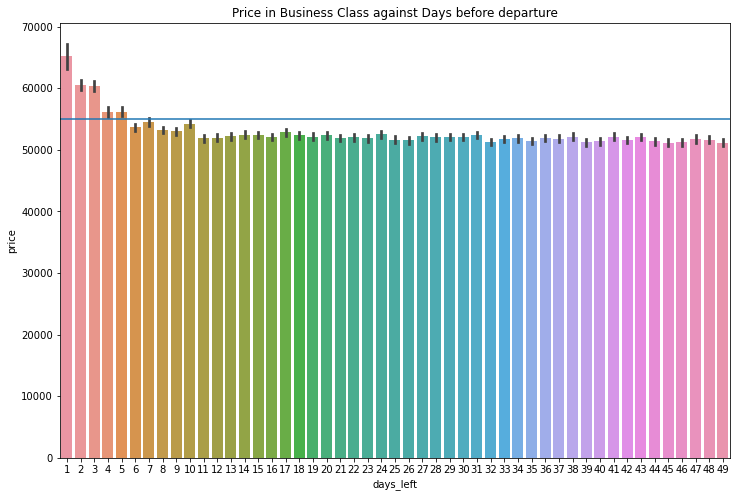

In [41]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Price in Business Class against Days before departure')
sns.barplot(x='days_left',y= 'price', data=df_buss)
plt.axhline(y=55000)

#### Here, We can see that ticket prices on an average are high when there are few days left to depature and are less expensive with more days till depature.  As the mean cost slopes downward as the number of days increases. The variation in distribution of mean price is higher in Economy Class. One has to buy minimum 15-18 days before departure to get tickets at lower price in economy class. While in business class, one has to buy just 6 days before

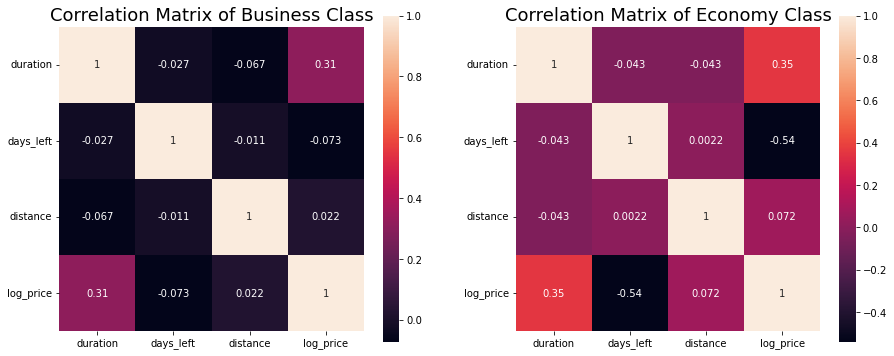

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
corr = df_buss.drop(columns = ['price'],axis=1).corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Business Class',fontsize = 18)
plt.subplot(1,2,2)
corr = df_econ.drop(columns = ['price'],axis=1).corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Economy Class',fontsize = 18)
plt.show()

# Fitting Multiple linear regression

In [43]:
Predictors = [['airline','departure_time','stops','arrival_time','Travelling_Cities','Ticket_Cat','duration','days_left']]
cat_columns = ['airline','departure_time','stops','arrival_time','Travelling_Cities','Ticket_Cat']
num_columns = ['duration','days_left']

In [44]:
X = data[['airline','departure_time','stops','arrival_time','Travelling_Cities','Ticket_Cat','duration','days_left']]
Y = data['log_price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state = 15)
df_train = pd.concat([x_train,y_train],axis = 1)

In [45]:
# defining accuracy measures
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [46]:
from statsmodels.formula.api import ols
fit = ols('log_price ~C(Travelling_Cities)+C(airline)+C(departure_time)+C(stops)+C(arrival_time)+C(Ticket_Cat)+(duration)+(days_left)', data=df_train).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 7.180e+04
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:14:29   Log-Likelihood:                -65247.
No. Observations:              225114   AIC:                         1.306e+05
Df Residuals:                  225079   BIC:                         1.309e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      10.5294      0.006   1814.491      0.000      10.518      10.541
C(Travelling_Cities)[T.Bangalore-Delhi]         0.0464      0.004     11.492      0.000       0.038       0.054
C(Travelling_Cities)[T.Chennai-Delhi]           0.0058      0.004      1.359      0.174      -0.003       0.014
C(Travelling_Cities)[T.Chennai-Hyderabad]      -0.1043      0.005    -22.152      0.000      -0.114      -0.095
C(Travelling_Cities)[T.Chennai-Mumbai]          0.0033      0.004      0.768      0.443      -0.005       0.012
C(Travelling_Cities)[T.Hyderabad-Bangalore]    -0.0528      0.004    -12.016      0.000      -0.061      -0.044
C(Travelling_Cities)[T.Hyderabad-Delhi]        -0.0188      0.004     -4.306      0.000      -0.027      -0.010
C(Travelling_Cities)[T.Hyderabad-Mumbai]       -0.0701      0.004    -16.595      0.000      -0.078      -0.062
C(Travelling_Cities)[T.Kolkata-Bangalore]       0.1757      0.004     41.339      0.000       0.167       0.184
C(Travelling_Cities)[T.Kolkata-Chennai]         0.1534      0.005     33.320      0.000       0.144       0.162
C(Travelling_Cities)[T.Kolkata-Delhi]           0.1628      0.004     38.976      0.000       0.155       0.171
C(Travelling_Cities)[T.Kolkata-Hyderabad]       0.1122      0.004     25.159      0.000       0.103       0.121
C(Travelling_Cities)[T.Kolkata-Mumbai]          0.1528      0.004     37.191      0.000       0.145       0.161
C(Travelling_Cities)[T.Mumbai-Bangalore]        0.0576      0.004     14.178      0.000       0.050       0.066
C(Travelling_Cities)[T.Mumbai-Delhi]           -0.0297      0.004     -7.429      0.000      -0.037      -0.022
C(airline)[T.Air_India]                         0.5224      0.003    149.780      0.000       0.516       0.529
C(airline)[T.GO_FIRST]                          0.4163      0.004    107.038      0.000       0.409       0.424
C(airline)[T.Indigo]                            0.3198      0.004     89.810      0.000       0.313       0.327
C(airline)[T.SpiceJet]                          0.4714      0.005     93.244      0.000       0.462       0.481
C(airline)[T.Vistara]                           0.6477      0.003    191.733      0.000       0.641       0.654
C(departure_time)[T.Early_Morning]              0.0188      0.002      8.226      0.000       0.014       0.023
C(departure_time)[T.Evening]                   -0.0094      0.002     -4.043      0.000      -0.014      -0.005
C(departure_time)[T.Late_Night]                 0.0509      0.011      4.811      0.000       0.030       0.072
C(departure_time)[T.Morning]                    0.0354      0.002     15.825      0.000       0.031       0.040
C(departure_time)[T.Night]                     -0.0075     

In [50]:
test_pred = fit.predict(x_test)
train_pred =fit.predict(x_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)
results_df = pd.DataFrame(data=[["Multiple linear regression",*evaluate(y_test, test_pred)]],columns=['Model','MAE','MSE', 'RMSE','R2 Square'])

Test set evaluation:
_____________________________________
MAE: 0.254135972717533
MSE: 0.10484884877388419
RMSE: 0.32380371951829734
R2 Square 0.9153199234881919
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.25414033677962
MSE: 0.10453848016174962
RMSE: 0.3233241100842151
R2 Square 0.9155808258641088
__________________________________


# Decision Tree 

### Introduction: 
Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks.
##### It is a tree-structured classifier with three types of nodes:
##### Root Node:
The Root Node is the initial node which represents the entire sample and may get split further into further nodes.
##### Interior Nodes:
The Interior Nodes represent the features of a data set and the branches represent the decision rules. 
#### Leaf Nodes:
Finally, the Leaf Nodes represent the outcome. 
This algorithm is very useful for solving decision-related problems.

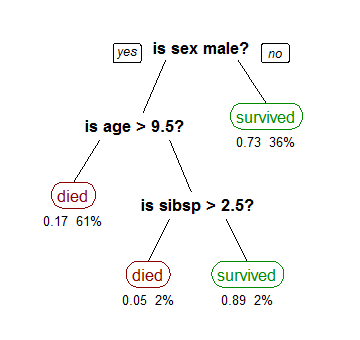

### Assumptions
Below are some of the assumptions we make while using Decision tree:
1. In the beginning, the whole training set is considered as the root.
2. Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

### Advantages
1. It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
2. Non-parametric approach that makes no assumptions of the training data or prediction residuals; e.g., no distributional, independence, or constant variance assumptions.
3. It helps to think about all the possible outcomes for a problem.
4. There is less requirement of data cleaning compared to other algorithms.
5. Performs well with large datasets.

### Disadvantages
1. The decision tree contains lots of layers, which makes it complex.
2. It may have an over-fitting issue, which can be resolved using the Random Forest algorithm.
3. For more class labels, the computational complexity of the decision tree may in crease.

## Data Preprocessing

In [52]:
Predictors = ['airline','departure_time','stops','arrival_time','Travelling_Cities ','Ticket_Cat','duration','days_left']
cat_columns = ['airline','departure_time','stops','arrival_time','Travelling_Cities','Ticket_Cat']
num_columns = ['duration','days_left']

In [53]:
encoder = OrdinalEncoder().fit_transform(data[cat_columns])
encoder = pd.DataFrame(encoder,columns = cat_columns)
X = pd.concat([encoder,data[num_columns]],axis=1)
Y = data['log_price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state = 15)

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
DTR = DecisionTreeRegressor(max_depth = 10)
DTR.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [69]:
test_pred_DT= DTR.predict(x_test)
train_pred_DT=DTR.predict(x_train)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred_DT)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred_DT)
results_df_2 = pd.DataFrame(data=[["Decision Tree Regression",*evaluate(y_test, test_pred_DT)]],columns=['Model','MAE', 'MSE', 'RMSE','R2 Square'])
results_df= results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.15157583991493584
MSE: 0.049162629810279565
RMSE: 0.22172647521277103
R2 Square 0.9602943160316977
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.148668168591291
MSE: 0.047132620308487305
RMSE: 0.21710048435802096
R2 Square 0.9619384472096152
__________________________________


# Random Forest Regression

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML.
It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve complex problem and to improve the performance of the model
As the name suggests, “Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive
accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output. The greater number of trees in the forest leads to higher accuracy
and prevents the problem of over fitting.

### Assumptions 

Assumption of no formal distributions. Being a non-parametric model, it can handle skewed and multi-modal data.

### Working of Random Forest 
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
###### In Random Forest each tree is grown as follows:
1. If the number of cases in the training set is N, sample N cases at random but with replacement, from the original data. This sample will be the training set for growing there.
2. If there are M input variables, a number m« M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing.
3. Each tree is grown to the largest extent possible. There is no pruning.




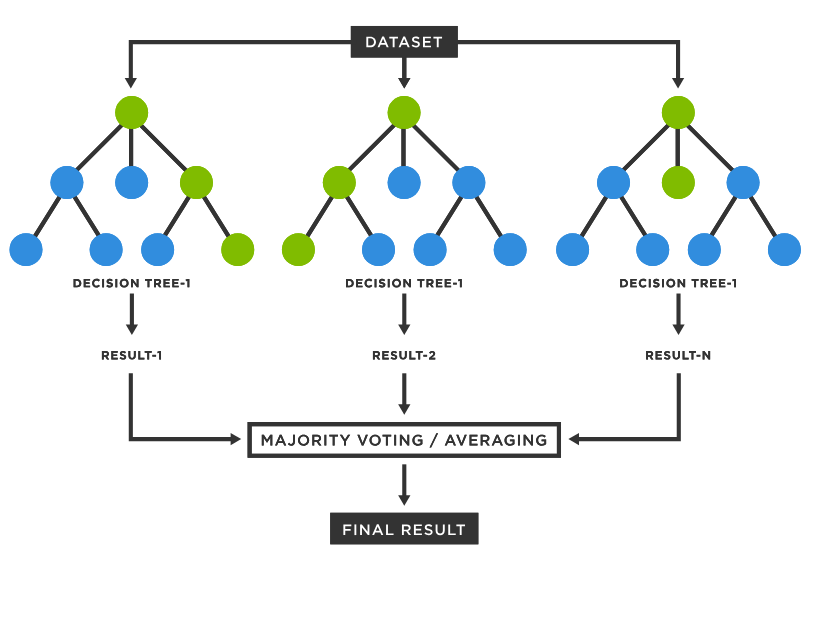

### Advantages
1. It can be used for both regression and classification tasks.
2. It is also easy to view the relative importance it assigns to the input features.
3. Random forest is also a very handy algorithm.

### Disadvantages
1. The main limitation of random forest is that many trees can make the algorithm too slow and ineffective for real-time predictions.
2. A more accurate prediction requires more trees, which results in as slower model.

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
RFR = RandomForestRegressor(n_estimators = 5, random_state = 15)
RFR.fit(x_train, y_train)
test_pred_RF = RFR.predict(x_test)
train_pred_RF= RFR.predict(x_train)


In [70]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred_RF)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred_RF)
results_df_3 = pd.DataFrame(data=[["Random Forest Regression",*evaluate(y_test, test_pred_RF)]],columns=['Model', 'MAE', 'MSE', 'RMSE','R2 Square'])
results_df= results_df.append(results_df_3, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.07929182646552274
MSE: 0.02461956097378452
RMSE: 0.15690621712916453
R2 Square 0.9801162689783727
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03264267894900129
MSE: 0.00579486144682098
RMSE: 0.07612398732870593
R2 Square 0.9953204081710809
__________________________________


In [71]:
print(pd.DataFrame(results_df))


                        Model       MAE       MSE      RMSE  R2 Square
0  Multiple linear regression  0.254136  0.104849  0.323804   0.915320
1    Decision Tree Regression  0.151576  0.049163  0.221726   0.960294
2    Random Forest Regression  0.079292  0.024620  0.156906   0.980116


#### From all three algorithms, we can see random forest gets the maximum r2_score. So, random forest is the best machine learning model for our dataset.